## Introduction

This notebook contains code on a simple linear regression problem.

### Data
The data used in this simple illustration contains information about 1559 products accross 10 different BigMart stores in different cities. The aim is to build a model that will predict the sales of each product at an outlet.

The data is in a CSV file and it includes columns such as: 
1. Item_Identifier - Unique product ID.
2. Item_Weight - Weight of product.
3. Item_Fat_Content - Whether the product is low fat or not.
4. Item_Visibility - The percentage of the total display area of all products.
5. Item_Type - The category to which the product belongs.
6. Item_MRP - Maximum Retail Price (list price) of the product.
7. Outlet_Identifier - Unique store ID
8. Outlet_Establishment_Year - The year in which the store was established.
9. Outlet_Size - The size of the store in terms of ground area covered.
10. Outlet_Location_Type - The type of city in which the store is located.
11. Outlet_Type - Whether the outlet is just a grocery store or some sort of supermarket.
12. Item_Outlet_Sales - Sales of the product in t particular store. This is the outcome variable to be predicted.

There are 8523 rows of data in the train dataset and 5681 rows of data in the test data set. Here is a link to the [data](https://www.kaggle.com/datasets/shivan118/big-mart-sales-prediction-datasets).

We will use this data to predict the sales of each product at an outlet.

In [24]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings('ignore')

In [25]:
#load data into pandas dataframe
train = pd.read_csv('data/regression/train.csv')
test = pd.read_csv('data/regression/test.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Exploratory Data Analysis

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [26]:
#Categorical columns in the train dataset
categorical = train.select_dtypes(exclude='number').columns.to_list()
print('Categorical columns: ')
print(categorical)

Categorical columns: 
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


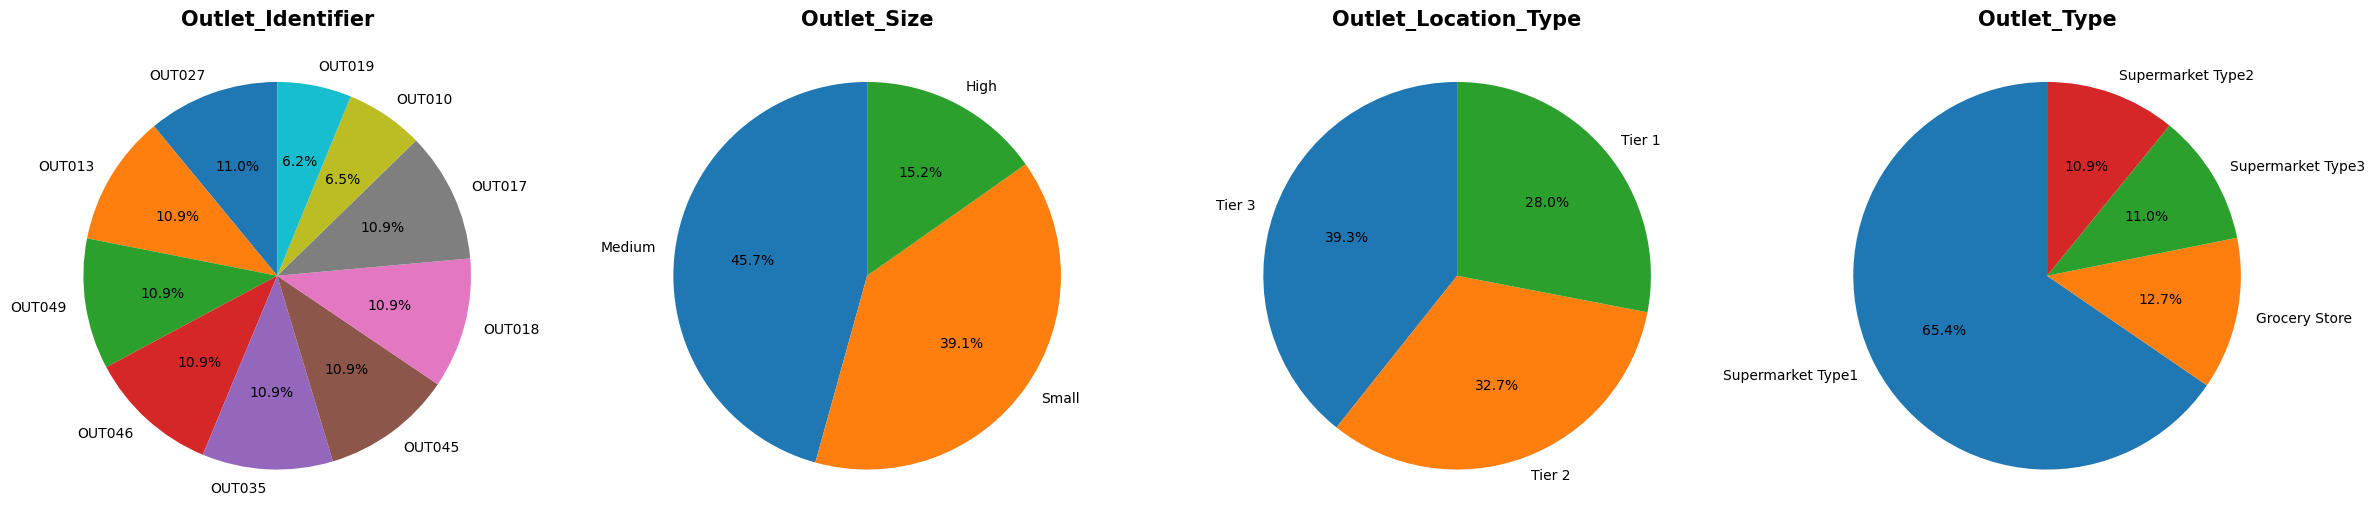

In [23]:
# Function to create a pie chart subplot
def create_pie_subplot(column_data, column_name, ax):
    counts = column_data.value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column_name, fontdict={'size':15, 'weight':'bold', 'color':'black'})

#Outlet Information
outlet_info = ['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
item_info = ['Item_Fat_Content', 'Item_Type']

# Set the number of rows and columns for the subplot grid
num_rows = 1
num_cols = len(outlet_info)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 6, 10))

#Create outlets information pie charts
for i, column in enumerate(outlet_info):
    create_pie_subplot(train[column], column, axes[i])

plt.tight_layout()
plt.show()

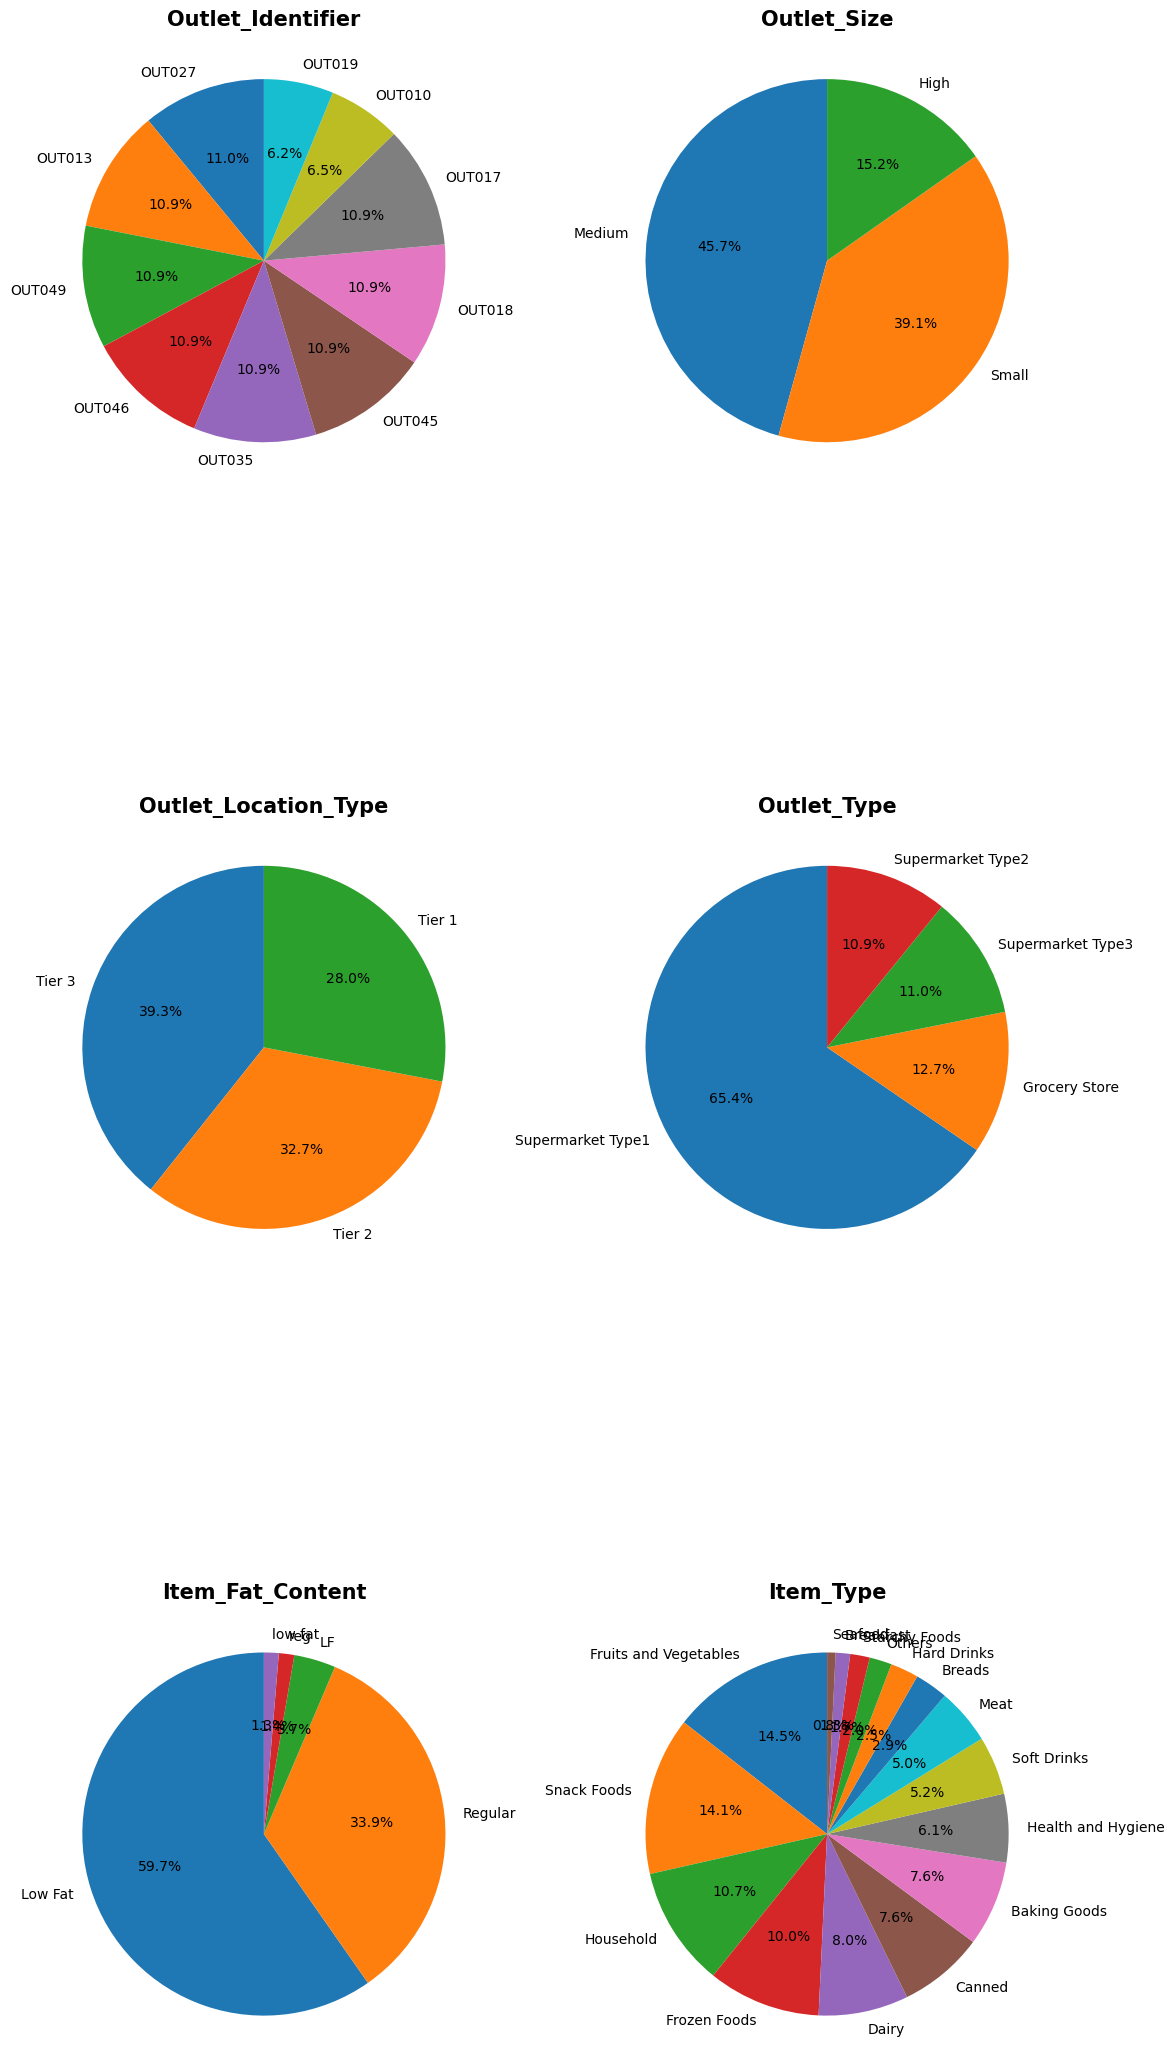

In [37]:
def create_pie_subplot(column_data, column_name, row, column):
    counts = column_data.value_counts()
    axes[row, column].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axes[row, column].set_title(column_name, fontdict={'size':15, 'weight':'bold', 'color':'black'})

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 25))

#Outlet Information
outlet_info = ['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

k = 0 #Start from the second item in the 'categorical' list
for r in range(2):
    for c in range(2):
        create_pie_subplot(train[outlet_info[k]], outlet_info[k], r, c)
        #counts = train[outlet_info[k]].value_counts()
        #axes[r, c].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        #axes[r, c].set_title(outlet_info[k], fontdict={'size':15, 'weight':'bold', 'color':'black'})
        k += 1

item_info = ['Item_Fat_Content', 'Item_Type']
for i, column in enumerate(item_info):
    create_pie_subplot(train[item_info[i]], item_info[i], 2, i)

plt.tight_layout(pad=1.5)
plt.show()

In [6]:
#check for null values in train dataset
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 null values in 'Item_Weight' column and 2410 in 'Outlet_Size' column of the test dataset.

In [7]:
#check for null values in test dataset
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

There are 976 null values in 'Item_Weight' column and 1606 in 'Outlet_Size' column of the test dataset.

In [10]:
#Duplicate rows in train dataset
train.duplicated().any()

False

There are no duplicate rows in train data set.

In [11]:
#Duplicate rows in test dataset
test.duplicated().any()

False

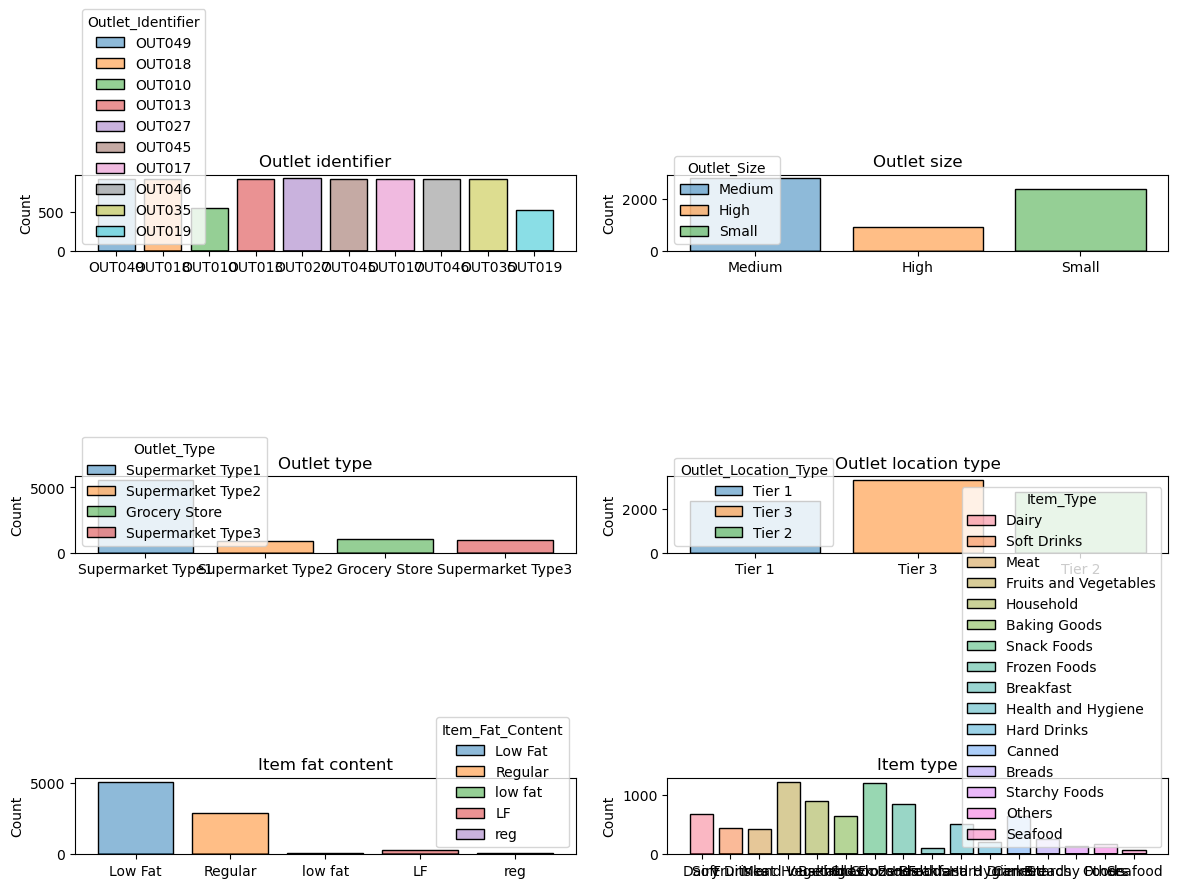

In [5]:
fig, axis = plt.subplots(3, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.150, wspace=0.125)

#Outlet Identifier
sns.histplot(data=df_train, x='Outlet_Identifier', ax=axis[0, 0], hue='Outlet_Identifier', shrink=.8).set_title('Outlet identifier')
axis[0, 0].set(xlabel=None)
#Outlet Size
sns.histplot(data=df_train, x='Outlet_Size', ax=axis[0, 1], hue='Outlet_Size', shrink=.8).set_title('Outlet size')
axis[0, 1].set(xlabel=None)
#Outlet Type
sns.histplot(data=df_train, x='Outlet_Type', ax=axis[1, 0], hue='Outlet_Type', shrink=.8).set_title('Outlet type')
axis[1, 0].set(xlabel=None)
#Outlet Location Type
sns.histplot(data=df_train, x='Outlet_Location_Type', ax=axis[1, 1], hue='Outlet_Location_Type', shrink=.8).set_title('Outlet location type')
axis[1, 1].set(xlabel=None)
#Seller type
sns.histplot(data=df_train, x='Item_Fat_Content', ax=axis[2, 0], hue='Item_Fat_Content', shrink=.8).set_title('Item fat content')
axis[2, 0].set(xlabel=None)
#Transmission type
sns.histplot(data=df_train, x='Item_Type', ax=axis[2, 1], hue='Item_Type', shrink=.8).set_title('Item type')
axis[2, 1].set(xlabel=None)



fig.tight_layout(pad=1.5)
plt.show()

#### Data Cleaning

In [4]:
#Calculate age of car, this will be a better value that the year of the car
from datetime import datetime
currentYear = datetime.now().year
print(currentYear)

2023


In [5]:
#create a new column for the age of the cars, it will be more useful than the Year of the car.
df['Car_Age'] = df.apply(lambda x: currentYear - x['Year'], axis = 1) 
#drop the 'Year' and 'Car_Name' column
df.drop(['Year'], axis=1, inplace=True)
df.drop(['Car_Name'], axis=1, inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


#### Data Visualization

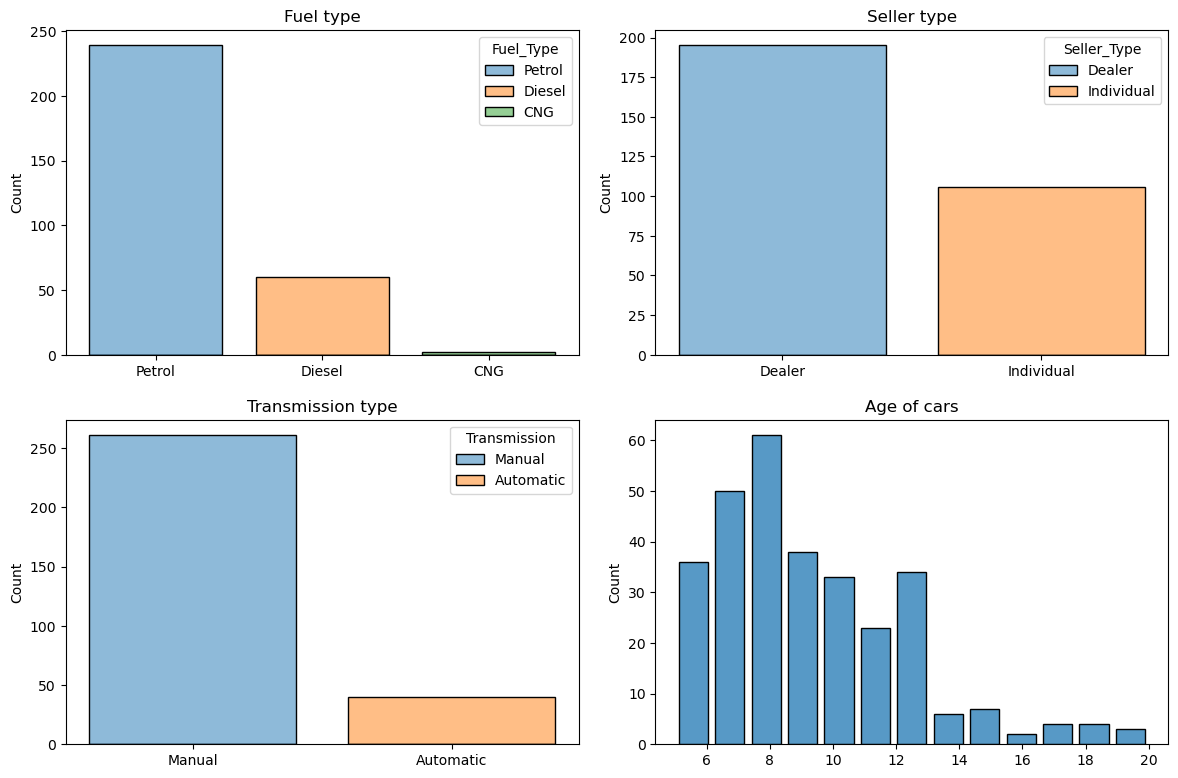

In [21]:
fig, axis = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.150, wspace=0.125)

#Fuel type
sns.histplot(data=df, x='Fuel_Type', ax=axis[0, 0], hue='Fuel_Type', shrink=.8).set_title('Fuel type')
axis[0, 0].set(xlabel=None)
#Seller type
sns.histplot(data=df, x='Seller_Type', ax=axis[0, 1], hue='Seller_Type', shrink=.8).set_title('Seller type')
axis[0, 1].set(xlabel=None)
#Transmission type
sns.histplot(data=df, x='Transmission', ax=axis[1, 0], hue='Transmission', shrink=.8).set_title('Transmission type')
axis[1, 0].set(xlabel=None)
#Age of cars
sns.histplot(data=df, x='Car_Age', ax=axis[1, 1], shrink=.8).set_title('Age of cars')
axis[1, 1].set(xlabel=None)


fig.tight_layout(pad=1.5)
plt.show()

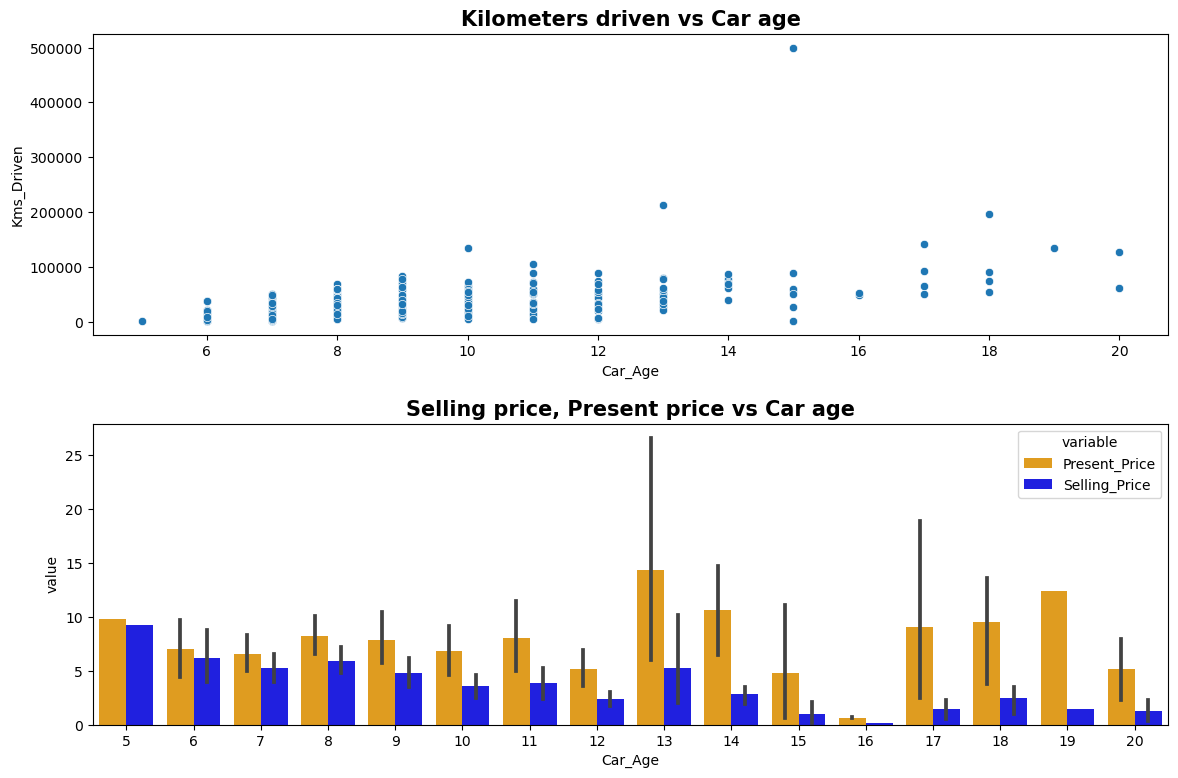

In [12]:
fig, axis = plt.subplots(2, 1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.300, wspace=0.125)

#Present prices of cars again the age of the cars
sns.scatterplot(data=df, x='Car_Age', y='Kms_Driven', ax=axis[0])
axis[0].set_title('Kilometers driven vs Car age', fontdict={'size':15, 'weight':'bold', 'color':'black'})

#Selling and present prices of cars against the age of the cars
sns.barplot(x='Car_Age', y='value', hue='variable', ax=axis[1],
             data=pd.melt(df, id_vars=['Car_Age'], value_vars=['Present_Price', 'Selling_Price']),
             palette=['orange', 'blue'])
axis[1].set_title('Selling price, Present price vs Car age', fontdict={'size':15, 'weight':'bold', 'color':'black'})

fig.tight_layout(pad=1.5)
plt.show()

<AxesSubplot: >

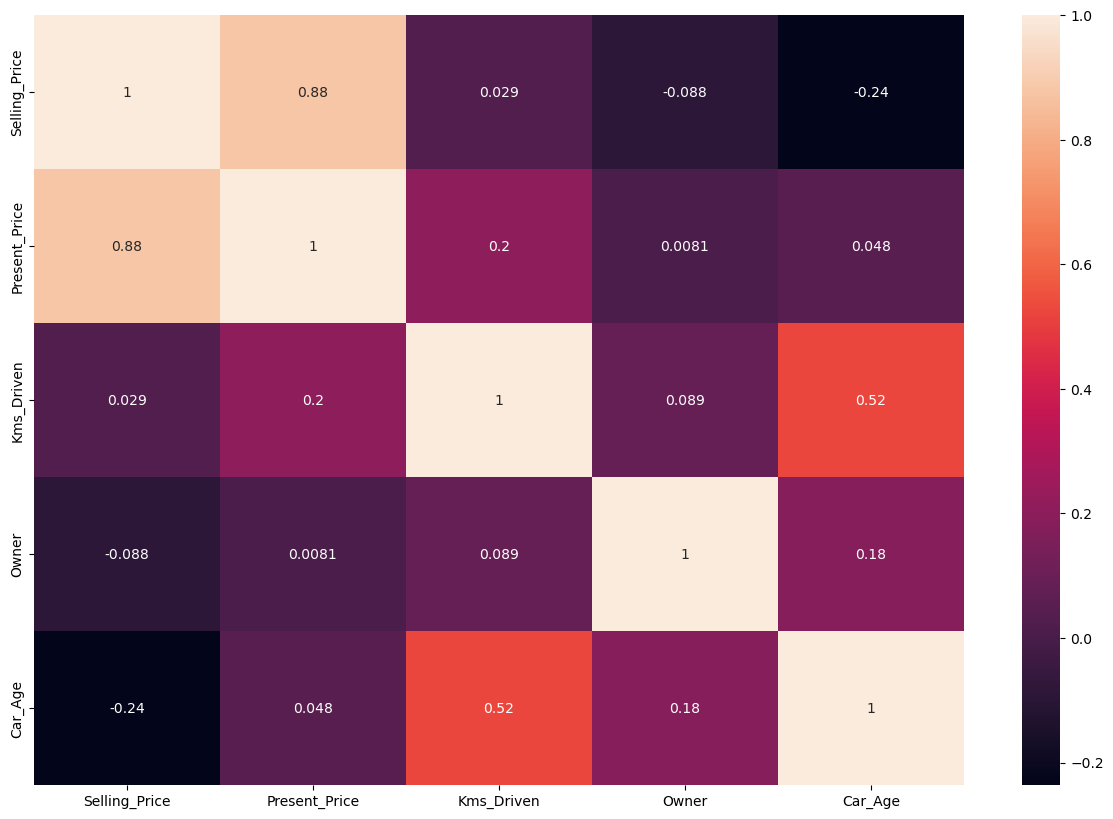

In [45]:
#check correlation of features in the dataset
plt.figure(figsize = (15, 10))
sns.heatmap(data = df.corr(), annot = True)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame named 'df'
# Replace this with your actual DataFrame
# For example, you can create a sample DataFrame like this:
# df = pd.DataFrame({'A': [10, 20, 30], 'B': [15, 25, 35], 'C': [5, 15, 25]})

# Example DataFrame (replace with your actual DataFrame)
data = {
    'Category1': [10, 20, 30],
    'Category2': [15, 25, 35],
    'Category3': [5, 15, 25]
}

df = pd.DataFrame(data)

df.head()

,Category1,Category2,Category3
0,10,15,5
1,20,25,15
2,30,35,25


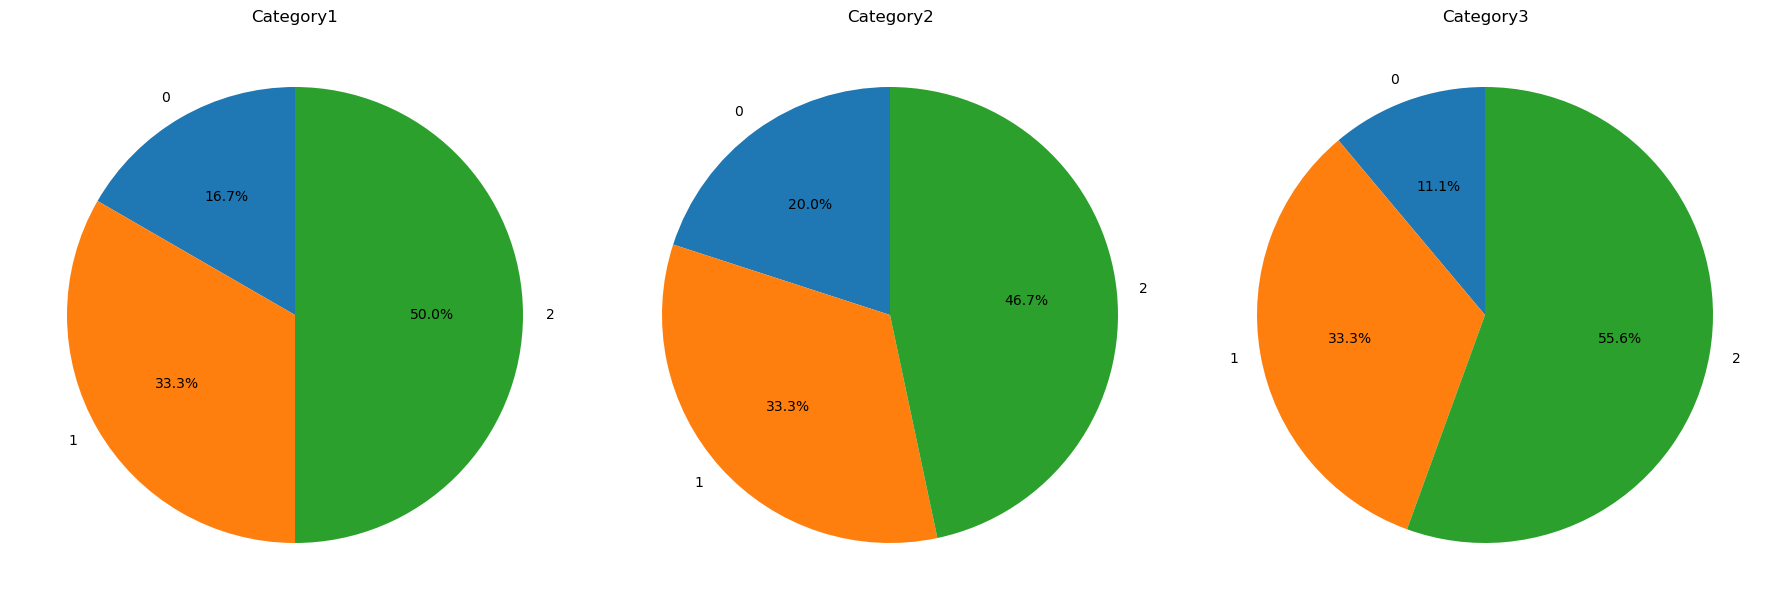

In [2]:
# Function to create a pie chart subplot
def create_pie_subplot(column_data, column_name, ax):
    ax.pie(column_data, labels=column_data.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column_name)

# Set the number of rows and columns for the subplot grid
num_rows = 1
num_cols = len(df.columns)

# Create the subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 6, 6))

# Convert the DataFrame columns to pie charts
for i, column in enumerate(df.columns):
    create_pie_subplot(df[column], column, axes[i])

plt.tight_layout()
plt.show()
